## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import sklearn
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\marri\AppData\Local\Temp\ipykernel_9088\2742330860.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## loading dataset

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("C:/Users/shiva/Desktop/PS_20174392719_1491204439457_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df2 = pd.get_dummies(df, columns=['type'])

In [4]:
df2.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [5]:
df2['nameOrig_string'] = df2['nameOrig'][0][0]

In [6]:
df2['nameDest_string'] = df2['nameDest'][0][0]

In [7]:
df2 = pd.get_dummies(df2, columns = ['nameOrig_string','nameDest_string' ])

In [8]:
df2.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'nameOrig_string_C',
       'nameDest_string_M'],
      dtype='object')

In [9]:
df2 = df2[['step', 'amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']]

In [10]:
df = df2

## visualizing dataset

[0.45946171 0.33732241 0.13583088]


C:\Users\marri\AppData\Local\Temp\ipykernel_9088\1864457408.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = mpl_toolkits.mplot3d.axes3d.Axes3D(plt.figure(figsize=(8, 8)))


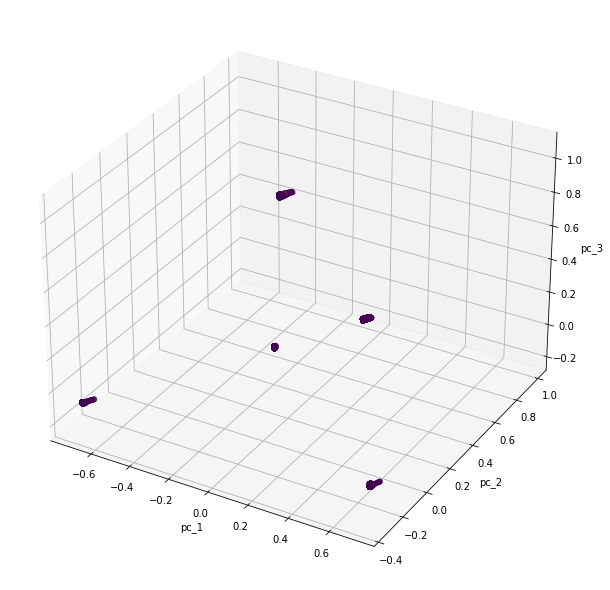

In [11]:
import sklearn
from sklearn.decomposition import PCA
import mpl_toolkits
def show_pca_df(df):
	x = df[df.columns[0:12]].to_numpy()
	y = df[df.columns[12]].to_numpy()

	x = sklearn.preprocessing.MinMaxScaler().fit_transform(x)
	pca = PCA(n_components=3)
	pca_result = pca.fit_transform(x)
	print(pca.explained_variance_ratio_)

	pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
	pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)

	ax = mpl_toolkits.mplot3d.axes3d.Axes3D(plt.figure(figsize=(8, 8)))
	ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
	ax.set_xlabel("pc_1")
	ax.set_ylabel("pc_2")
	ax.set_zlabel("pc_3")
	plt.show()
    
show_pca_df(df)

[0.34364647 0.28628686 0.22108442]


C:\Users\marri\AppData\Local\Temp\ipykernel_9088\1864457408.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = mpl_toolkits.mplot3d.axes3d.Axes3D(plt.figure(figsize=(8, 8)))


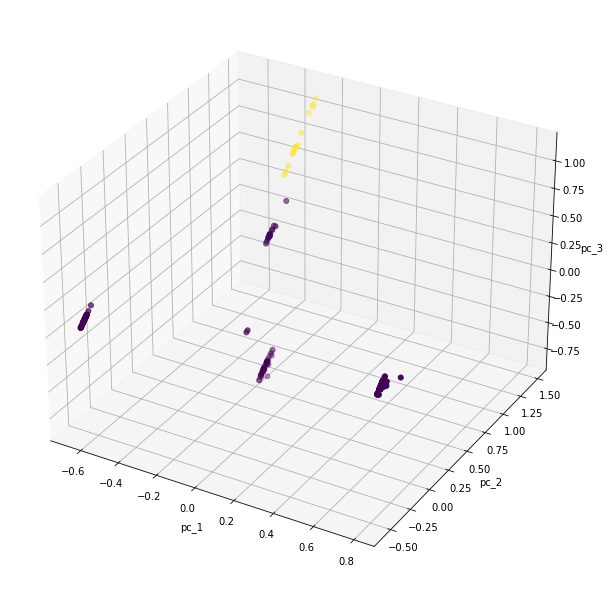

In [12]:
df_anomaly = df[df[df.columns[12]] > 0]
df_normal = df[df[df.columns[12]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df2 = pd.concat([ df_anomaly, df_normal])

show_pca_df(df2)

In [13]:
X = df[df.columns[1:12]]
print(len(X))
y = df[df.columns[12]]
pd.Series(y).value_counts()

6362620


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

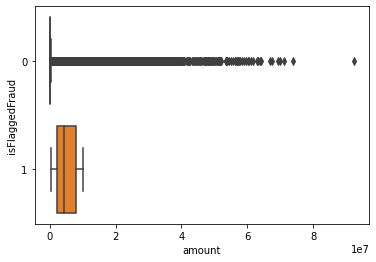

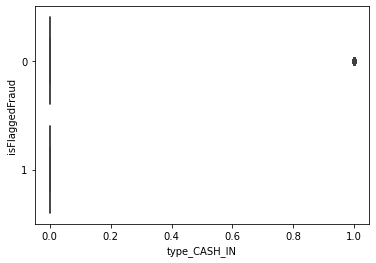

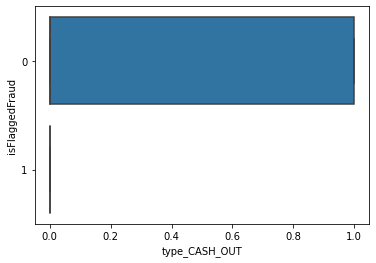

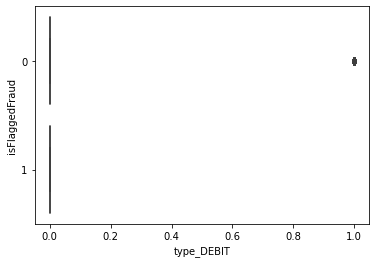

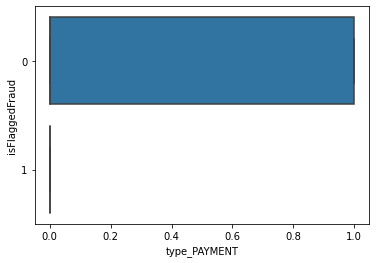

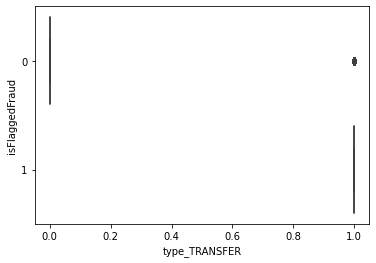

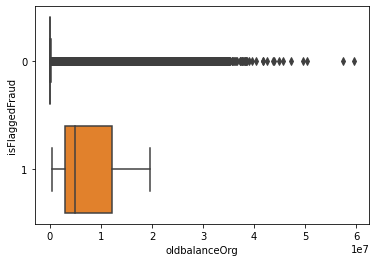

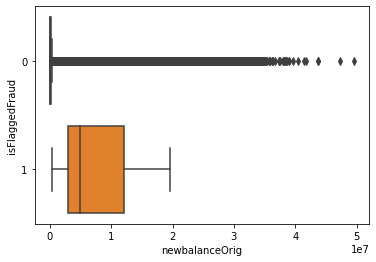

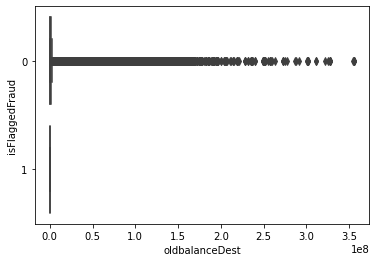

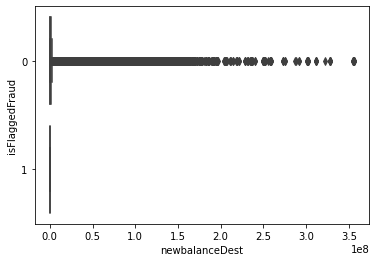

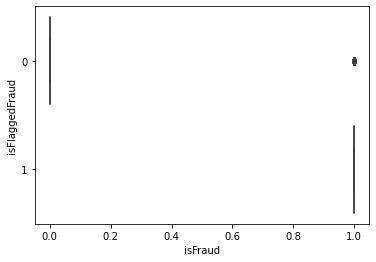

In [14]:
import seaborn as sns
for c in X.columns:
    sns.boxplot( x=X[c],y=y, orient='h',showfliers = True)
    plt.show()

In [15]:
train_cols = X.columns

In [16]:
from sklearn.model_selection import train_test_split
X, test, y, y_test = train_test_split(X, y, stratify=y, test_size=.15)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler = sklearn.preprocessing.RobustScaler()
scaler = sklearn.preprocessing.StandardScaler()
X  = pd.DataFrame(scaler.fit_transform(X[train_cols]), columns=train_cols)
test = pd.DataFrame(scaler.transform(test[train_cols]), columns=train_cols)
X.shape

(5408227, 11)

In [17]:
from sklearn.feature_selection import SelectKBest, chi2,SelectFromModel
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
for v in [sklearn.svm.LinearSVC(), LogisticRegression(penalty="l2"),]:
    kb = SelectFromModel(v) 
    kb.fit(X, y)
    print(X.columns[kb.get_support(True)])

C:\Users\marri\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Index(['oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest'], dtype='object')
Index(['oldbalanceOrg', 'newbalanceOrig', 'newbalanceDest', 'isFraud'], dtype='object')


C:\Users\marri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
import keras
from keras import layers

input_s = layers.Input(shape=(X.shape[1]))
encoded = layers.Dense(20, activation='relu')(input_s)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(5, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(X.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_s, decoded)
autoencoder.compile(
  loss='mse',
  optimizer='adam',
  metrics=['mse'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense (Dense)               (None, 20)                240       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 10)                60    

Epoch 1/20
169008/169008 [==============================] - 236s 1ms/step - loss: 0.8031 - mse: 0.8031 - val_loss: 0.7527 - val_mse: 0.7527
Epoch 2/20
169008/169008 [==============================] - 241s 1ms/step - loss: 0.7933 - mse: 0.7933 - val_loss: 0.7528 - val_mse: 0.7528


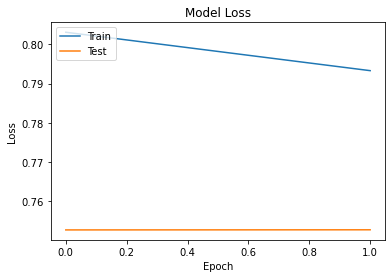

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
history = autoencoder.fit(x=X, y=X, epochs=20, verbose=1, validation_data=(test, test), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
train_predicted_x = autoencoder.predict(x=X)
train_events_mse = keras.losses.mean_squared_error(X, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)
print(cut_off)

169008/169008 [==============================] - 259s 2ms/step
1.5817630887031564


In [21]:
predicted = autoencoder.predict(x=test)
ms =  keras.losses.mean_squared_error(test, predicted)

test_df = pd.DataFrame(test.copy(), columns=test.columns)
print(test_df.columns)
test_df['Target'] = y_test.values
test_df['MSE'] = ms
test_df['Outlier'] = test_df['MSE'] > cut_off
test_df['Outlier'].value_counts()

29825/29825 [==============================] - 96s 3ms/step
Index(['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')


False    906227
True      48166
Name: Outlier, dtype: int64

In [22]:
len(y_test)
print(len(predicted))
test = test_df.drop(columns=['Target', 'MSE', 'Outlier' ]) #Should we remove 'Outlier'

954393


In [23]:
test.head()

,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-0.293552,-0.530933,-0.736530,-0.080941,1.398912,-0.302256,-0.288678,-0.292405,-0.323768,-0.333180,-0.035925
1,0.344888,-0.530933,-0.736530,-0.080941,-0.714841,3.308449,-0.199221,-0.292405,1.795467,1.731950,-0.035925
2,-0.116550,-0.530933,1.357717,-0.080941,-0.714841,-0.302256,-0.267278,-0.292405,-0.172971,-0.164047,-0.035925
3,-0.295996,-0.530933,-0.736530,-0.080941,1.398912,-0.302256,-0.288678,-0.292405,-0.323768,-0.333180,-0.035925
4,-0.192285,-0.530933,1.357717,-0.080941,-0.714841,-0.302256,-0.282046,-0.292405,-0.000546,-0.017155,-0.035925


In [24]:
type(y_test)

pandas.core.series.Series

In [25]:
print(test_df['Target'].value_counts())
print(pd.Series(y_test).value_counts())
test_df['Outlier'].value_counts()

0    954391
1         2
Name: Target, dtype: int64
0    954391
1         2
Name: isFlaggedFraud, dtype: int64


False    906227
True      48166
Name: Outlier, dtype: int64

In [26]:
test_df['Target'].isnull().value_counts()
pd.Series(y_test).value_counts()
print(test_df.shape)
pd.Series(y_test).value_counts()

(954393, 14)


0    954391
1         2
Name: isFlaggedFraud, dtype: int64

In [27]:
pd.crosstab(test_df['Target'], test_df['Outlier'])

Outlier,False,True
Target,,
0,906227,48164
1,0,2


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

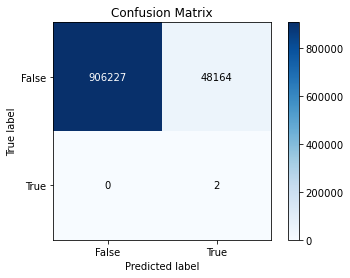

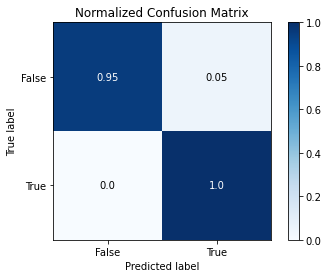

In [28]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=True)

In [29]:
X.head()

,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.152268,1.883476,-0.736530,-0.080941,-0.714841,-0.302256,3.470944,3.514432,-0.039135,-0.144175,-0.035925
1,-0.286213,-0.530933,-0.736530,-0.080941,1.398912,-0.302256,-0.271044,-0.277122,-0.323768,-0.333180,-0.035925
2,0.044794,-0.530933,1.357717,-0.080941,-0.714841,-0.302256,-0.288678,-0.292405,-0.243513,-0.202609,-0.035925
3,-0.268763,-0.530933,-0.736530,-0.080941,1.398912,-0.302256,-0.284043,-0.292405,-0.323768,-0.333180,-0.035925
4,-0.054683,-0.530933,1.357717,-0.080941,-0.714841,-0.302256,-0.277382,-0.292405,-0.255884,-0.230478,-0.035925


In [30]:
X.shape

(5408227, 11)

In [31]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(contamination=.05,random_state=0,n_jobs=7, n_estimators=200)
isf.fit(X)
test_df['outlier2'] = isf.predict(test)
test_df['outlier2'].value_counts()

C:\Users\marri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    906167
-1     48226
Name: outlier2, dtype: int64

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

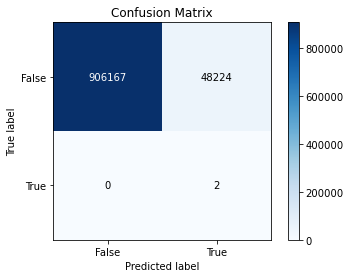

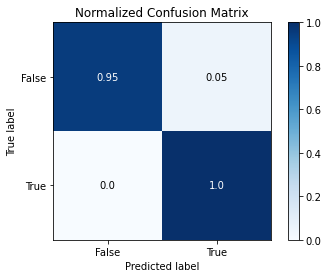

In [33]:
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=True)